In [5]:
%pylab inline
import os
import pandas as pd
from scipy import ndimage
from scipy.fftpack import fft,ifft
import mpmath

Populating the interactive namespace from numpy and matplotlib


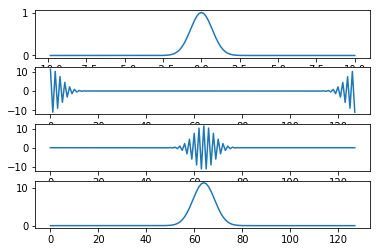

In [6]:
L=20
n=128
x2=linspace(-L/2,L/2,n+1)
x=x2[1:n+1]
u=exp(-x**2)
ut=fft(u)
utshift = fftshift(ut)
plt.figure()
plt.subplot(4,1,1)
plt.plot(x,u)
subplot(4,1,2)
plot(real(ut))
subplot(4,1,3)
plot(real(utshift))
subplot(4,1,4)
plot(abs(utshift))

(-0.93758, -0.9374)

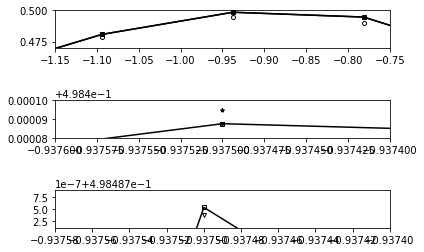

In [7]:
L=20
n=128
x2=linspace(-L/2,L/2,n+1)
x=x2[1:n+1]
dx = x[1]-x[0]
u=1/(cosh(x))
ut = fft(u)
k1 = np.arange(0,n/2)
k2 = np.arange(-n/2,0)
k = (2*pi/L)*np.concatenate((k1,k2), axis=0)
ut1 = np.multiply(k,ut)*1j
ut2 = -k*k*ut
u1=real(ifft(ut1))
u2=real(ifft(ut2))
u1exact =-(1/cosh(x))*tanh(x)
u2exact =(1/cosh(x))-2*(1/cosh(x))**3

ux = [0]*(n)
ux[0]=(-3*u[0]+4*u[1]-u[2])/(2*dx)

for j in range (1,n-2):
    ux[j]=(u[j+1]-u[j-1])/(2*dx)
ux[n-1]=(3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx)

ux2 = [0]*(n)
ux2[0]=(-3*u[0]+4*u[1]-u[2])/(2*dx)
ux2[1]=(-3*u[1]+4*u[2]-u[3])/(2*dx)
for j in range (3,n-3):
    ux2[j]=(-u[j+2]+8*u[j+1]-8*u[j-1]+u[j-2])/(12*dx)
ux2[n-2]=(3*u[n-2]-4*u[n-3]+u[n-4])/(2*dx)
ux2[n-1]=(3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx)

### PLOTTING

plt.figure()
plt.subplot(5,1,1)
plt.plot(x,u1exact,'ks-',mfc='none',markersize=4)
plt.plot(x,u1,'k',markersize=4)
plt.plot(x,ux,'ok',mfc='none',markersize=4)
plt.plot(x,ux2,'k*',markersize=4)
ax = plt.gca()
ax.set_ylim([0.47,0.5])
ax.set_xlim([-1.15,-0.75])

plt.subplot(5,1,3)
plt.plot(x,u1exact,'ks-',mfc='none',markersize=4)
plt.plot(x,u1,'vk',markersize=4)
plt.plot(x,ux,'ok',markersize=4)
plt.plot(x,ux2,'k*',markersize=4)
ax = plt.gca()
ax.set_ylim([0.49848,0.49850])
ax.set_xlim([-0.9376,-0.9374])

plt.subplot(5,1,5)
plt.plot(x,u1exact,'sk-',mfc='none',markersize=4)
plt.plot(x,u1,'kv',mfc='none',markersize=4)
plt.plot(x,ux,'ko',markersize=4)
plt.plot(x,ux2,'k*',markersize=4)
ax = plt.gca()
ax.set_ylim([0.4984871,0.4984879])
ax.set_xlim([-0.93758,-0.9374])

(-10, 10)

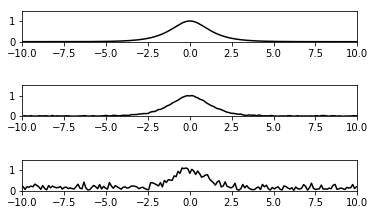

In [8]:
#L=30; % time slot to transform
#n=512; % number of Fourier modes 2^9
#t2=linspace(-L,L,n+1); t=t2(1:n); % time discretization
#k=(2*pi/(2*L))*[0:(n/2-1) -n/2:-1]; % frequency components of FFT
#u=sech(t); % ideal signal in the time domain
#figure(1), subplot(3,1,1), plot(t,u,’k’), hold on
#noise=1;
#ut=fft(u);
#utn=ut+noise*(randn(1,n)+i*randn(1,n));
#un=ifft(utn);
#figure(1), subplot(3,1,2), plot(t,abs(un),’k’), hold on

L=30
n=512
t2= linspace(-L,L,n+1)
t=t2[1:n+1]
k1 = np.arange(0,n/2)
k2 = np.arange(-n/2,0)
k = (2*pi/L)*np.concatenate((k1,k2), axis=0)
u=1/(cosh(t))
plt.figure()
plt.subplot(6,1,1)
plt.plot(t,u,'k')
ax = plt.gca()
ax.set_ylim([0,1.5])
ax.set_xlim([-10,10])

noise = 1
ut= fft(u)
utn = ut+noise*(np.random.random(n)+np.random.random(n)*1j)
un = ifft(utn)
plt.subplot(6,1,3)
plt.plot(t,abs(un),'k')
ax = plt.gca()
ax.set_ylim([0,1.5])
ax.set_xlim([-10,10])

noise = 10
ut= fft(u)
unt = ut+noise*(np.random.random(n)+np.random.random(n)*1j)
un = ifft(unt)
plt.subplot(6,1,5)
plt.plot(t,abs(un),'k')
ax = plt.gca()
ax.set_ylim([0,1.5])
ax.set_xlim([-10,10])

Text(0.5,0,'Wavenumber(k)')

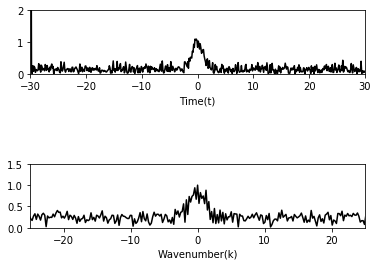

In [9]:
plt.figure()
plt.subplot(3,1,1)
plt.plot(t,abs(un),'k')
plt.xlabel('Time(t)')
axis = plt.gca()
axis.set_ylim([0,2])
axis.set_xlim([-30,30])

plt.subplot(3,1,3)
plot(fftshift(k),abs(fftshift(unt))/(max(abs(fftshift(unt)))),'k')
ax = plt.gca()
ax.set_ylim([0,1.5])
ax.set_xlim([-25,25])
plt.xlabel('Wavenumber(k)')
#subplot(2,1,1), plot(t,abs(un),’k’)
#axis([-30 30 0 2])
#xlabel(’time (t)’), ylabel(’|u|’)
#subplot(2,1,2)
#plot(fftshift(k),abs(fftshift(unt))/max(abs(fftshift(unt))),’k’)
#axis([-25 25 0 1])
#xlabel(’wavenumber (k)’, ylabel(’|ut|/max(|ut|)’)



Text(0.5,0,'Wavenumber(k)')

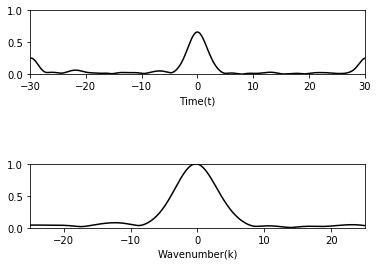

In [10]:
filter = exp(-0.2*k**2)
unft = filter*unt
unf = ifft(unft)
plt.figure()
plt.subplot(3,1,1)
plt.plot(t,abs(unf),'k')
plt.xlabel('Time(t)')
axis = plt.gca()
axis.set_ylim([0,1])
axis.set_xlim([-30,30])

plt.subplot(3,1,3)
plt.plot(fftshift(k),abs(unf)/(max(abs(unf))),'k')
ax = plt.gca()
ax.set_ylim([0,1])
ax.set_xlim([-25,25])
plt.xlabel('Wavenumber(k)')


In [50]:
L=30
n=512
utn = [0]
t2=linspace(-L,L,n+1)
t=t2[1:n+1]
k1 = np.arange(0,n/2)
k2 = np.arange(-n/2,0)
k = (2*pi/L)*np.concatenate((k1,k2), axis=0)
ks=fftshift(k)
noise=10
realize=[1,2,5,100]
u=1/(cosh(t))
ave=[0]*(n+1)
ut=fft(u)
a=0
for jj in range(0,4):
    for j in range (0,realize[jj]):
        for x in range(0,512):
            utn[j][:]= ut+noise*(np.random.random(n)+np.random.random(n)*1j)

TypeError: 'int' object does not support item assignment